In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
data.nunique()

acousticness          4714
artists              33375
danceability          1232
duration_ms          50212
energy                2332
explicit                 2
id                  169909
instrumentalness      5401
key                     12
liveness              1741
loudness             25313
mode                     2
name                132940
popularity             100
release_date         10882
speechiness           1628
tempo                84548
valence               1739
year                   100
dtype: int64

In [4]:
data_by_artist = pd.read_csv('data_by_artist.csv')
data_by_artist.head(3)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.0,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7


In [5]:
data_by_genres = pd.read_csv('data_by_genres.csv')
data_by_genres.head(3)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1


In [6]:
data_by_year = pd.read_csv('data_by_year.csv')
data_by_year.head(3)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1


In [7]:
data_w_genres = pd.read_csv('data_w_genres.csv')
data_w_genres.head(3)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.0,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


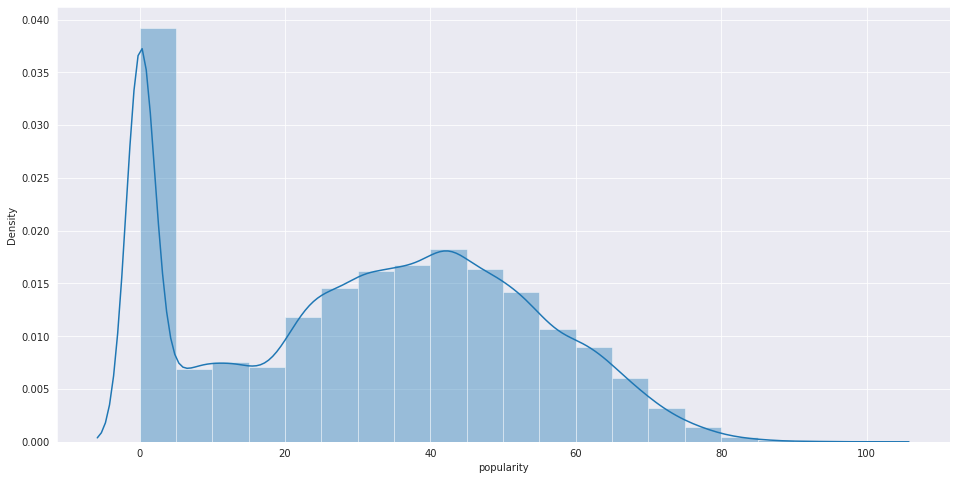

In [8]:
plt.figure(figsize=(16, 8))
sns.distplot(data.popularity,bins=20)

Text(0.5, 0, 'Year')

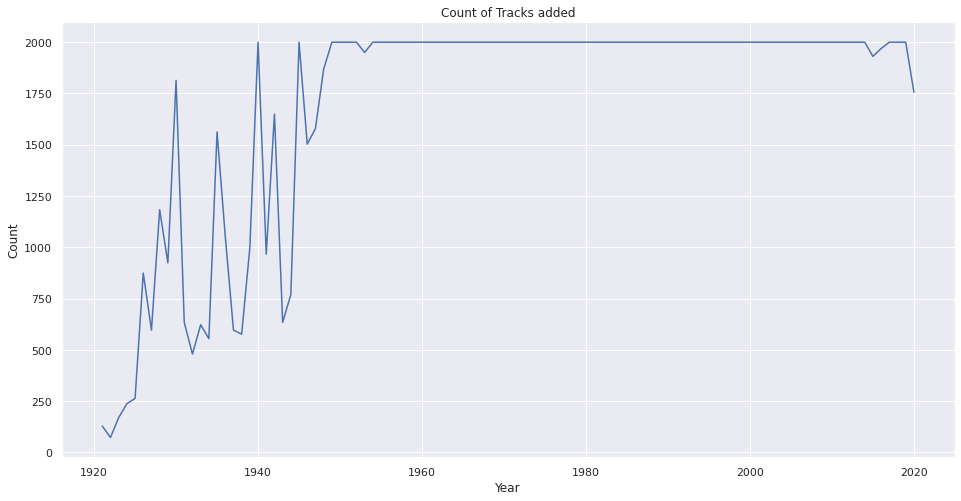

In [9]:

x = data.groupby("year")["id"].count().reset_index()

plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.lineplot(data=x, x="year", y="id")
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

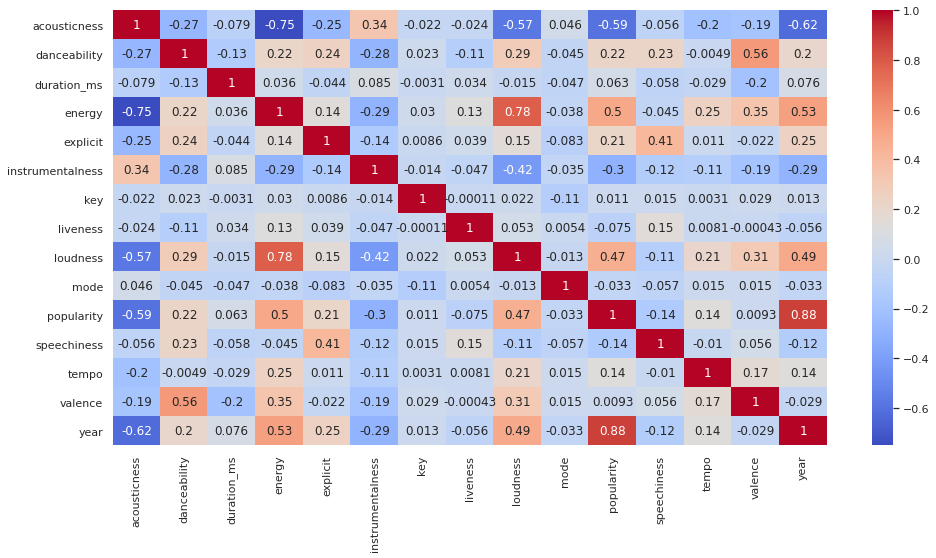

In [10]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1152x576 with 0 Axes>

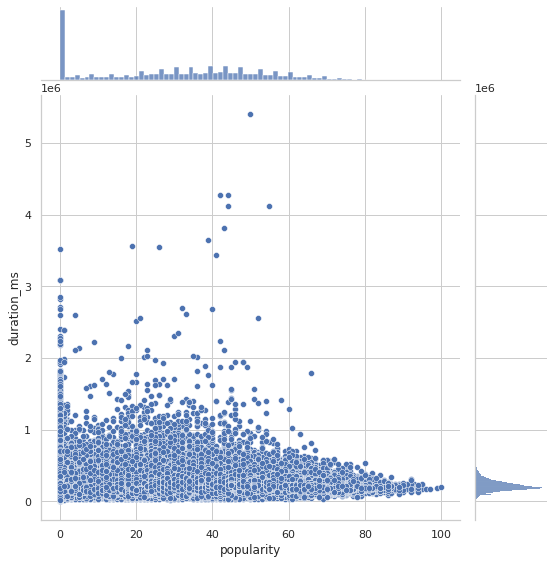

In [11]:
plt.figure(figsize=(16, 8))
sns.jointplot(data.popularity,data.duration_ms,data=data, height = 8)

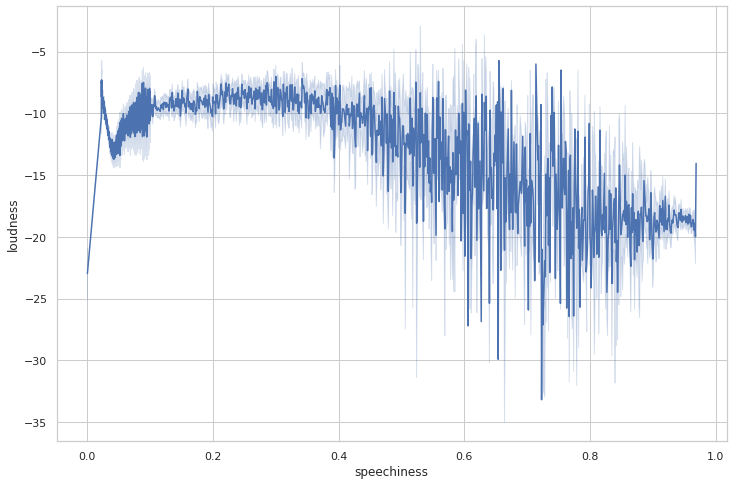

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='speechiness',y='loudness',data=data)

In [13]:
data_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

Text(0, 0.5, 'Popularity')

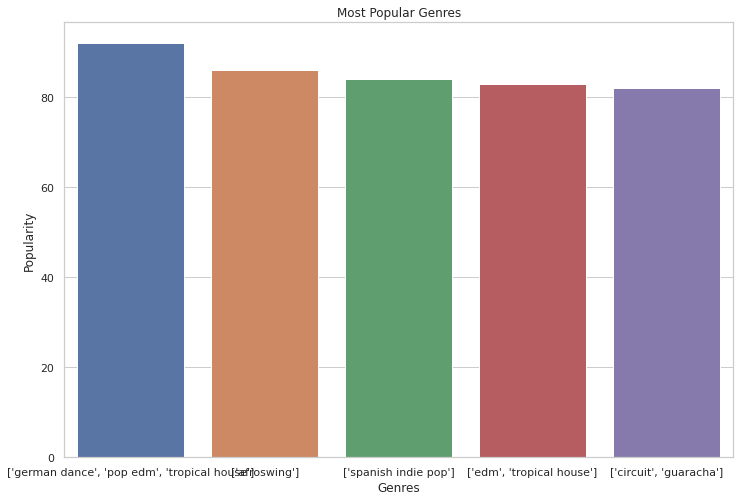

In [14]:
df = data_w_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df.index,y=df)
ax.set_title('Most Popular Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Popularity')

Text(0.5, 0, 'Year')

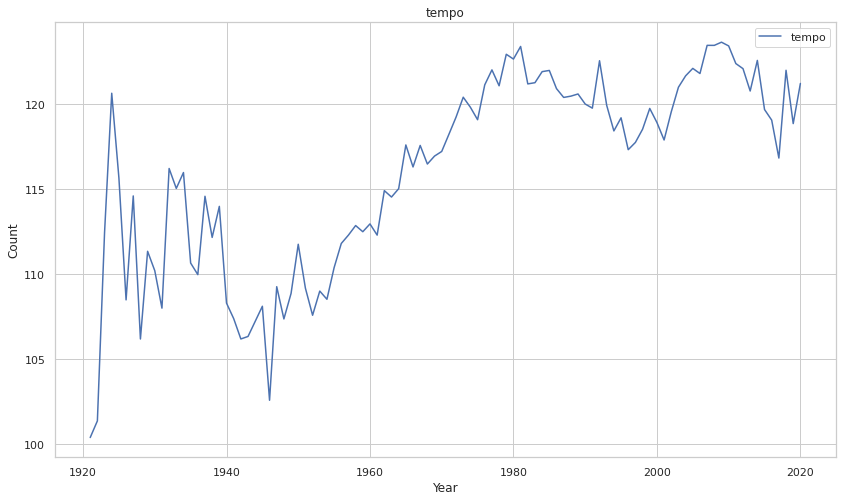

In [15]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
df = data.groupby("year")["tempo"].mean()
ax= sns.lineplot(x=df.index,y=df,label='tempo')
ax.set_title('tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

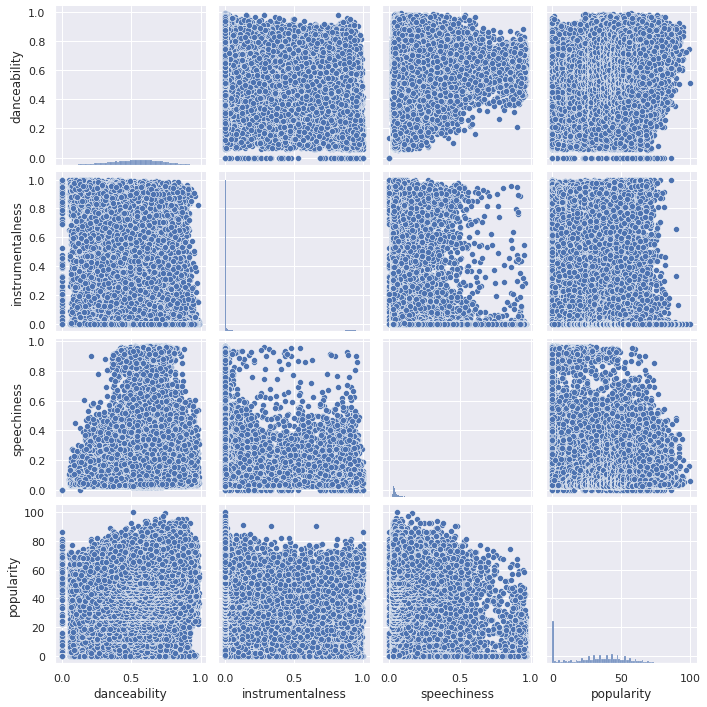

In [16]:
sns.set(style="darkgrid")
column_names = ['danceability','instrumentalness','speechiness','popularity']
sns.pairplot(data[column_names])

Text(0.5, 0.98, 'Energy of Danceable Songs For Years')

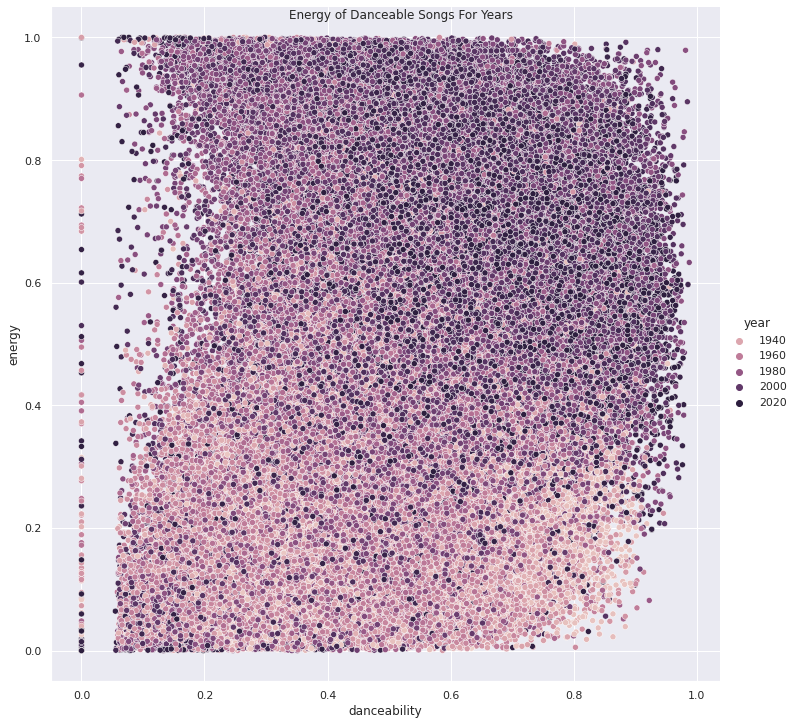

In [17]:

sns.set(style="darkgrid")
ax = sns.relplot(data=data, x="danceability", y="energy",hue= 'year',height = 10)
ax.fig.suptitle("Energy of Danceable Songs For Years",
                  fontsize=12, fontdict={"weight": "bold"})

In [18]:
df = data.groupby('id')['popularity'].mean()
MostPopularFiveSongIds = np.array(df.sort_values(ascending = False)[0:5].index)
mostPopularSongs = []
for songId in MostPopularFiveSongIds:
    mostPopularSongs.append(np.array(data[data['id']== songId]['name']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Artists')

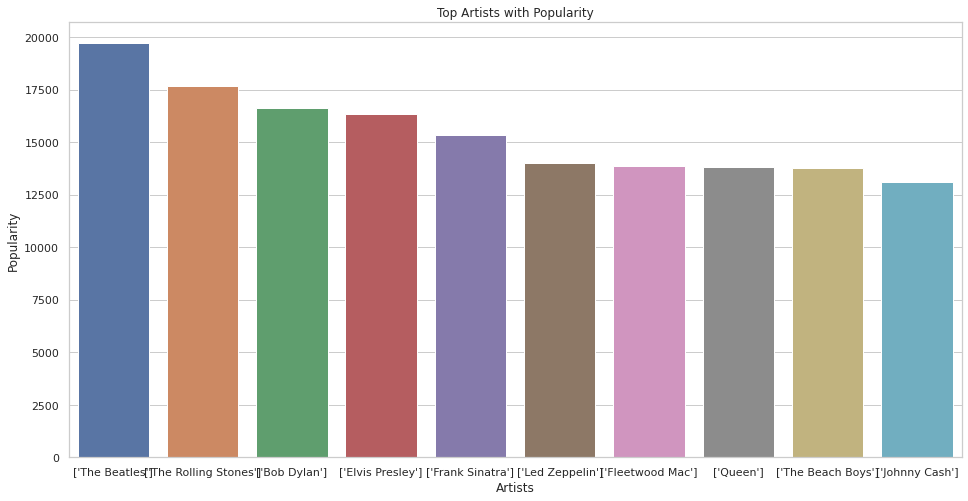

In [19]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
df = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(df.index, df)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')

Text(0.5, 1.0, 'Duration of Songs By Year')

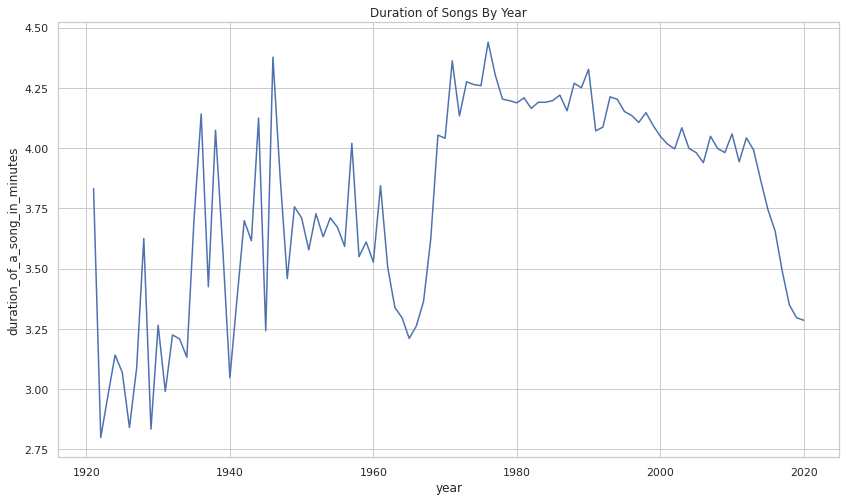

In [21]:
palette = sns.color_palette("rocket_r")
df = data.groupby('year')['duration_ms'].mean().reset_index().rename(columns = {'duration_ms':'duration_of_a_song_in_minutes'})
df['duration_of_a_song_in_minutes'] = df['duration_of_a_song_in_minutes'] / 60000.0
plt.figure(figsize=(14,8))
ax = sns.lineplot(data = df, x='year',y='duration_of_a_song_in_minutes')
ax.set_title('Duration of Songs By Year')

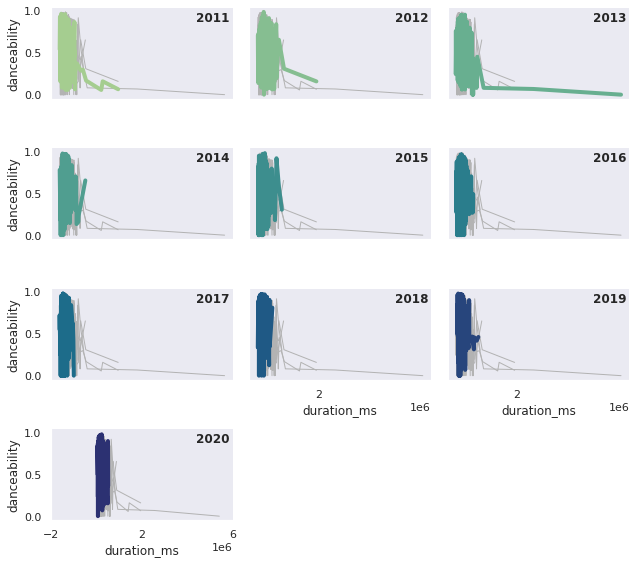

In [22]:
sns.set_theme(style="dark")
years = sorted(data['year'].unique(),reverse = True)
last_ten_years = years[:10]
ten_years = pd.DataFrame(data = last_ten_years,columns=['year'])
data_10_years = pd.merge(data, ten_years,on = 'year',how = 'inner')





g = sns.relplot(
    data=data_10_years,
    x="duration_ms", y="danceability", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    sns.lineplot(
        data=data_10_years, x="duration_ms", y="danceability", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )


ax.set_xticks(ax.get_xticks()[::2])


g.set_titles("")
g.set_axis_labels("duration_ms", "danceability")
g.tight_layout()


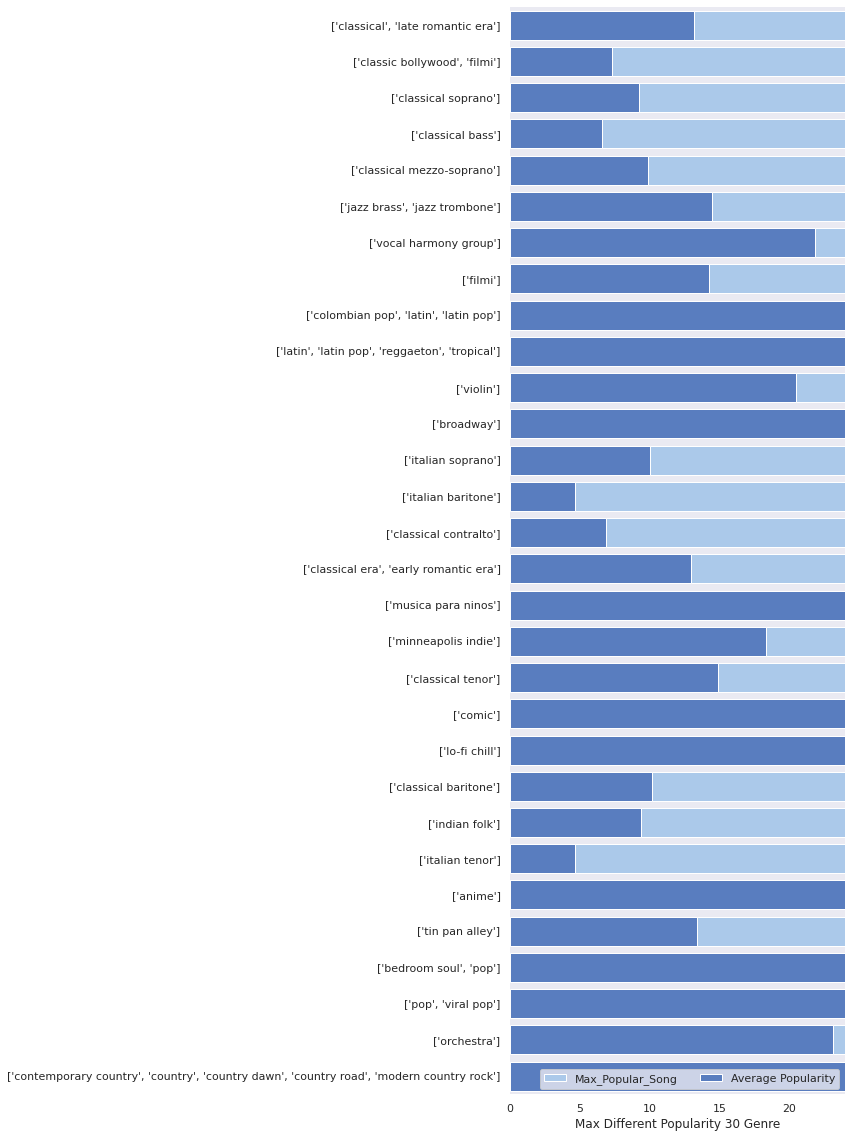

In [23]:
data_ort_max = data_w_genres.groupby('genres').agg(
    {'popularity':['max','mean']
     }
     ).reset_index()

data_ort_max['difference'] =  data_ort_max[('popularity', 'max')] - data_ort_max[('popularity', 'mean')]
data_ort_max = data_ort_max.sort_values(by=['difference'], ascending=False)
data_ort_max_diff = data_ort_max[1:31]





f, ax = plt.subplots(figsize=(6, 20))
sns.set_color_codes("pastel")
sns.barplot(x= ('popularity', 'max') , y="genres", data=data_ort_max_diff,
            label="Max_Popular_Song", color="b")

sns.set_color_codes("muted")
sns.barplot(x=('popularity', 'mean'), y="genres", data=data_ort_max_diff,
            label="Average Popularity", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Max Different Popularity 30 Genre")
sns.despine(left=True, bottom=True)